# S08 T01: Tasca del test d'hipòtesis

Descripció:

Aprèn a realitzar test d'hipòtesis amb Python.

Objectius:

- Calcular el p-valor de diferents variable o conjunt de variables
- Interpretar el p-valor i dir si rebutja la hipòtesi nul·la

**Nivell 1**

- Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 


In [1]:
%matplotlib inline
# load the libraries
import matplotlib.pyplot aslt p
import plotnine as lt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seabs snsorn a
impo ats
#from scipy.stats import ttest_1samp, ttest_iond, f_eway
#from statsmodels.stats.muticomp( (import patukeyhsdirwise_, MultiCompukeyhsd


# 120 years of Olympic history: athletes and results

## basic bio data on athletes and medal results from Athens 1896 to Rio 2016

Dataset: [Source](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv)

**Description**:

- Context

This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from <www.sports-reference.com> in May 2018. The R code I used to scrape and wrangle the data is on GitHub. I recommend checking my kernel before starting your own analysis.

Note that the Winter and Summer Games were held in the same year up until 1992. After that, they staggered them such that Winter Games occur on a four year cycle starting with 1994, then Summer in 1996, then Winter in 1998, and so on. A common mistake people make when analyzing this data is to assume that the Summer and Winter Games have always been staggered.

- Content

The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events). The columns are:

`ID` - Unique number for each athlete\
`Name` - Athlete's name\
`Sex` - M or F\
`Age` - Integer\
`Height` - In centimeters\
`Weight` - In kilograms\
`Team` - Team name\
`NOC` - National Olympic Committee 3-letter code\
`Games` - Year and season\
`Year` - Integer\
`Season` - Summer or Winter\
`City` - Host city\
`Sport` - Sport\
`Event` - Event\
`Medal` - Gold, Silver, Bronze, or NA\

- Acknowledgements

The Olympic data on www.sports-reference.com is the result of an incredible amount of research by a group of Olympic history enthusiasts and self-proclaimed 'statistorians'. Check out their blog for more information. All I did was consolidated their decades of work into a convenient format for data analysis.

- Inspiration

This dataset provides an opportunity to ask questions about how the Olympics have evolved over time, including questions about the participation and performance of women, different nations, and different sports and events.

In [3]:
Athletes_df = pd.read_csv('./input/athlete_events.csv', index_col = 'Year').drop('ID', axis = 1) Athletes_df.sample(5)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
Year,,,,,,,,,,,,,
1992,Elin Nilsen,F,23.0,168.0,55.0,Norway,NOR,1992 Winter,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Women's 5 kilometres,NaN
2004,Allana Amy Slater,F,20.0,155.0,50.0,Australia,AUS,2004 Summer,Summer,Athina,Gymnastics,Gymnastics Women's Horse Vault,NaN
1988,Yolande Patricia Straughn (-Phillips),F,20.0,155.0,50.0,Barbados,BAR,1988 Summer,Summer,Seoul,Athletics,Athletics Women's 400 metres,NaN
1980,Mohammed Yaseen Mohammed,M,17.0,NaN,70.5,Iraq,IRQ,1980 Summer,Summer,Moskva,Weightlifting,Weightlifting Men's Lightweight,NaN
1998,Bart Veldkamp,M,30.0,181.0,84.0,Belgium,BEL,1998 Winter,Winter,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",Bronze


In [4]:
Athletes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 1992 to 2002
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  210945 non-null  float64
 4   Weight  208241 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Games   271116 non-null  object 
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), object(10)
memory usage: 29.0+ MB


In [5]:
Athletes_df.describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


In [6]:
Athletes_df.shape

(271116, 13)

In [7]:
# checking for null values
Athletes_df.dropna(inplace=True)
Athletes_df.shape

(30181, 13)

In [8]:
# checking for duplicate values; False=> NO duplicated values
Athletes_df.duplicated().values.any()

False

# The Basics of Statistical Hypothesis Testing
#
#Ffirst statistical hypothesis tests: the T-tes

eWe are going to compare the mean age in years of the Olympcs athletess with a given value. We want to know if the mean age of the athletes in this sample is significantly different from the chosen age of 25 years. We will use a one-sample T-test, which allows us to compare the mean of a sample with a chosen value. We will perform this test on the given sample against the crucial 25-year value and verify its significance by comparing the standard alpha value of 0.05 with the p-value.

- **One-sample T-test**

We will perform a One-sample T-test using the ttest_1sample() function. Using the data set of Olympic athletes statistics, we will analyze the age found in the athletes and use a One-sample T-test to determine if the mean age found among the Olympic athletes differs significantly from 50-50. First, we will make some graphs, then we will do our test)

Text(0, 0.5, 'Number of athletes')

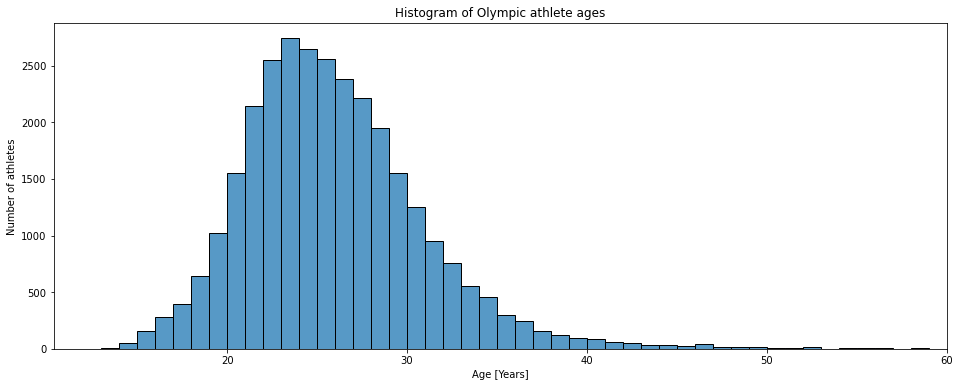

In [11]:
# Histogram of Olympic athlete ages
plt.figure(figsi e  =(16, 6)
)ax  
sns.histplot(da =ta Athletes_df, x = 'e'Ag, binwidth = 1, bins = )0e
x_min, x_max = ax.get_xlim()
ax.set_xlim(x_min, 60) # set the limits back to the ones of the histpl')
plt.te('itlHistogram of Olympic athlete asg');
plt.xla'Agebel( [Ye''e');
plt.ylabel('r of Numbeathsars');

In [12]:
print(f'The sample mean of age is: {Athletes_df.Age.mean():.3f} years')

The sample mean of age is: 25.429 years


## Hypothesis:

- $H_0: \mu_M =5$ 27The average age of olympic athletes is 25 years old.

- $H_1: \mu_e  25$ n5q The average age of olympic athletes is not 25 years old.

<br/>

## The One-sample T-test:

- We will use any value close to the mean old age (25.0).

<old.

In [15]:
# The One-sample T-test will be used:
result  .ttest_1sam(pAthletes_df.Age.dropna(),2 7.0, axis = 0)

In [16]:
stat = result.statistic
print(f'T-statistic = {stat:.3f}')

T-statistic = 14.760


In [17]:
pval = result.pvalue
print(f'p-value = {pval:.3f}')

p-value = 0.000


In [20]:
alpha = 0.05 # 5%
print('No rejected the__H0 hypothesis') ifp vap  >alphA else print('Rejected the__H0 hypothesis')

Rejected the H_0 hypothesis


## Conclusion:

Since the p-value of our test (0.00) is less than alpha = 0.05, the null hypothesis of the test is reject. There are sufficient evidence to state that the mean age of Olympic athletes is different from 25 years.

- We will now use the mean age (25.429)

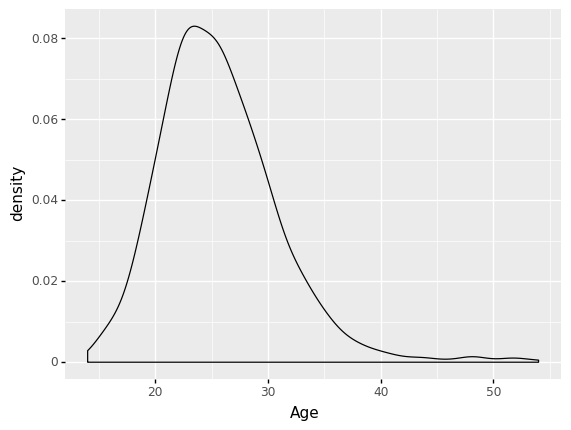

In [25]:
# Create the density plot
print(p9.ggplt(oAthletes_df.sample(10002)+ p9.aes 'xAg ' )+ p9.geom_density(al   a =05.))

In [26]:
print(f'The sample mean of age is: {Athletes_df.Age.mean():.3f}')

The sample mean of age is: 25.429


In [27]:
# Perform the One-sample T-test
t_result = ttest_1samp(Athletes_df['Age'], 25.429)
print(t_result)

Ttest_1sampResult(statistic=0.00040010694945129006, pvalue=0.9996807634953293)


In [31]:

# Test significance
alpha = 0.05
if turesalt[1] < alp    print('a:
 The mean age differs from given 'ased")
else:
   'print("No significant bia' found")

No significant bias found


## Conclusion:

As the p-value of our test (1.00) is greater than alpha = 0.05, the null hypothesis of the test is not rejected. There is sufficient evidence to affirm that the mean age of Olympic athletes is equal to 25 years.

## scipy.stats.ttest_1samp

**``scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided')``**

Calculate the T-test for the mean of ONE group of scores.

This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

| Parameters: | a:               | array_like                                                                                           |
|:------------|:-----------------|:-----------------------------------------------------------------------------------------------------|
|             |                  | Sample observation.                                                                                  |
|             | **popmean**:     | float or array_like                                                                                  |
|             |                  | Expected value in null hypothesis. If array_like, then it must have the same shape as a excluding the axis dimension.|
|             | **axis**:        | int or None, optional                                                                                |
|             |                  | Axis along which to compute test; default is 0. If None, compute over the whole array a.             |
|             | **nan_policy**:  | {‘propagate’, ‘raise’, ‘omit’}, optional                                                             |
|             |                  | Defines how to handle when input contains nan. The following options are available (default is ‘propagate’).|
|             |                  | - ‘propagate’: returns                                                                               |
|             |                  | - ‘raise’: throws an error                                                                           |
|             |                  | - ‘omit’: performs the calculations ignoring nan values                                              |
|             | **alternative**: | {‘two-sided’, ‘less’, ‘greater’}, optional                                                           |
|             |                  | Defines the alternative hypothesis. The following options are available (default is ‘two-sided’):    |
|             |                  | - ‘two-sided’                                                                                        |
|             |                  | - ‘less’: one-sided                                                                                  |
|             |                  | - ‘greater’: one-sided                                                                               |
|             |                  | New in version 1.6.0.                                                                                |
| **Returns:**| **statistic**:   | float or array                                                                                       |
|             |                  | t-statistic.                                                                                         |
|             | **pvalue**:      | float or array                                                                                       |
|             |                  | Two-sided p-value.                                                        The 1-sample T-test will be used:

**Nivell 2**

- Exercici 2

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.

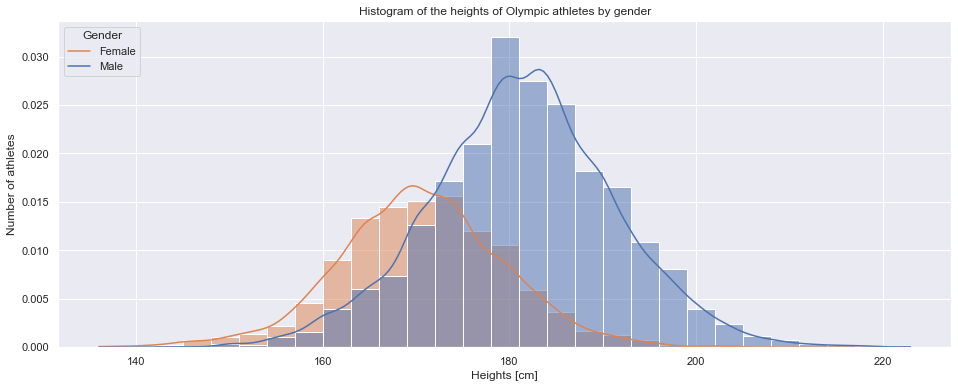

In [56]:
# Histogram of the heights of Olympic athletes by gender.
plt.figure(figsi e  =126, 6)
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set_theme(style="darkgrid") ax = sns.histplot(oata =tAthletes_dfd x = 'HeightiAg',    hSex'ue=', binwidth = 3, bins = 15, kde = True, stat = "density", common_norm = )rueS
x_min, x_max = ax.get_xlim()
ax.set_xlim(x_min, x_max) # set the limits back to the ones of the histplot=rue)title('
plt.Histogram of the heights of Olympic athletes by g' f ');xlabel('
plt.Height')Age');
plt.ylumber of abel('Na lyelt.legend(rs');
ploc = 'upper left', title = 'Gender', labels = ['Female'n('Sex') 
plt.show()

# Two-sample T-test
Now we are going to compare two sets of samples. We will look at the heights of Olympic athletes, but we will compare them by gender between men and women. Does the average height of athletes differ according to gender? A two-sample T-test can tell us whether the two-sample means differ significantly. We will do an exploratory data analysis and then the groups will be compared using a statistical test.l color.

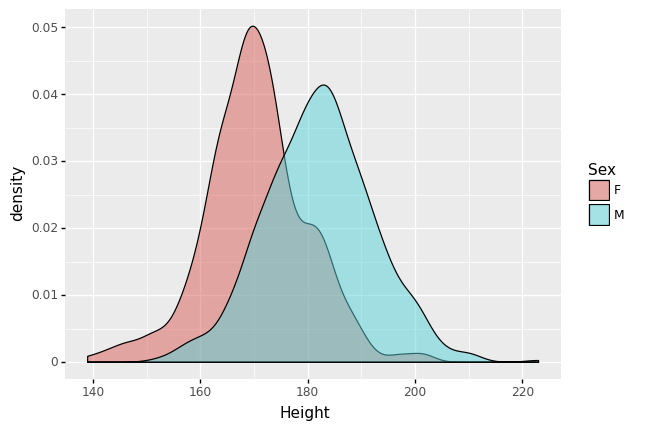

In [32]:
# Create the density plot 
print(p9.ggplot(Athletes_df.sample(1000)) + p9.aes('Height', fill = 'Sex' ) + p9.geom_density(alpha = 0.5)))

We will create two arrays, Female_heights and Male_heights, that contain the heights of the athletes for each sex.

In [33]:
# Create two arrays
Female_heights = Athletes_df[Athletes_df.Sex == "F"].Height
Male_heights = Athletes_df[Athletes_df.Sex == "M"].Height

## Hypothesis:

$H_0: \mu_M = \mu_F$ The average height of olympic athletes (men) is equal to that of olympic athletes (women).

$H_1: \mu_M \neq \mu_F$ The average height of olympic athletes (men) is different from that of olympic athletes (women).

<br/>

## The Two-sample T-test:

Finally we will use the function ttest_ind() to compare men and women, and we will assign the result to t_result to print it.

<br/>


In [35]:
# Perform the two-sample T-test
t_result = ttest_ind(Female_heights, Male_heights)
print(t_result)

Ttest_indResult(statistic=-92.54401351903742, pvalue=0.0)


In [36]:

# Test signii cance
alpha= 0.05
i_ (taresult[1] < alpha):
    print("Men and women have differenn      ages")
    else: print("No significant difference found")

Men and women have different mean ages


## Conclusion:

Because the p-value of our test (0.0) is less than alpha = 0.05, we reject the null hypothesis of the test. We have enough evidence to say that average height by gender is no different between men and women.


## scipy.stats.ttest_ind

**`scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)`**

Calculate the T-test for the means of two independent samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by de

| Parameters: | a, b:             | array_like                                                                             |
|:------------|:------------------|:---------------------------------------------------------------------------------------|
|             |                   | The arrays must have the same shape, except in the dimension corresponding to axis (the first, by default).|
|             | **axis**:         | int or None, optional                                                                  |
|             |                   | Axis along which to compute test. If None, compute over the whole arrays, a, and b.    |
|             | **equal_var**:    | bool, optional                                                                         |
|             |                   | If True (default), perform a standard independent 2 sample test that assumes equal population variances \[1\]. If False, perform Welch’s t-test, which does not assume equal population variance [2].|
|             |                   | New in version 0.11.0.                                                                 |
|             | **nan_policy**    | {‘propagate’, ‘raise’, ‘omit’}, optional                                               |
|             |                   | Defines how to handle when input contains nan. The following options are available (default is ‘propagate’):|
|             |                   | - ‘propagate’: returns nan                                                             |
|             |                   | - ‘raise’: throws an error                                                             |
|             |                   | - ‘omit’: performs the calculations ignoring nan values                                |
|             |                   | The ‘omit’ option is not currently available for permutation tests or one-sided asympyotic tests.|
|             | **permutations**: | non-negative int, np.inf, or None (default), optional                                  |
|             |                   | If 0 or None (default), use the t-distribution to calculate p-values. Otherwise, permutations is the number of random permutations that will be used to estimate p-values using a permutation test.|
|             |                   | If permutations equals or exceeds the number of distinct partitions of the pooled data, an exact test is performed instead (i.e. each distinct partition is used exactly once). See Notes for details.|
|             |                   | New in version 1.7.0.                                                                  |
|             | **random_state**: | {None, int, numpy.random.Generator, numpy.random.RandomState}, optional                |
|             |                   | If seed is None (or np.random), the numpy.random.RandomState singleton is used. If seed is an int, a new RandomState instance is used, seeded with seed. If seed is already a Generator or RandomState instance then that instance is used.|
|             |                   | Pseudorandom number generator state used to generate permutations (used only when permutations is not None).|
|             |                   | New in version 1.7.0.                                                                  |
|             | **alternative**:  | {‘two-sided’, ‘less’, ‘greater’}, optional                                             |
|             |                   | Defines the alternative hypothesis. The following options are available (default is ‘two-sided’):|
|             |                   | - ‘two-sided’                                                                          |
|             |                   | - ‘less’: one-sided                                                                    |
|             |                   | - ‘greater’: one-sided                                                                 |
|             |                   | New in version 1.6.0.                                                                  |
|             | **trim**:         | float, optional                                                                        |
|             |                   | If nonzero, performs a trimmed (Yuen’s) t-test. Defines the fraction of elements to be trimmed from each end of the input samples. If 0 (default), no elements will be trimmed from either side. The number of trimmed elements from each tail is the floor of the trim times the number of elements. Valid range is [0, .5).|
|             |                   | New in version 1.7.                                                                    |
| **Returns**:| **statistic**:    | float or array                                                                         |
|             |                   | The calculated t-statistic.                                                            |
|             | **pvalue**:       | float or array                                                                         |
|             |                   | The two-tailed p-value.                                                                |fault.

**Nivell 3**

- Exercici 3

Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

# One-way ANOVA
Let's take another look at some data from our Olympic dataset. How does the weight of athletes vary between teams from different countries? In this exercise, we will use a one-way ANOVA to verify the presence of a significant variation in the weight of the Olympic athletes. The Athletes DataFrame contains the weights of male team athletes from the United States, France, and China. We will use a one-way ANOVA to find out if the differences between these groups of values are significant.

In [38]:
# Create arrays
France_athletes  =Athletes_d[fAthletes_df.Team == 'France'].Weight
US_athlet =es Athletes_[fdAthletes_df.Team == 'United States'].Weight
China_athle = tesAthletes[df Athletes[df.Team == 'China'].ghtva)

## Hypothesis:

$H_0: \mu_B = \mu_V = \mu_W$ The average weight of Olympic athletes from teams from France, USA and China is equal.

$H_1$: The three averages are not equal.

In [40]:
# Perform one-way ANOVA
anova = f_oneway(France_athletes, US_athletes, China_athletes)
print(anova)

F_onewayResult(statistic=208.62521382021026, pvalue=2.2117875306410868e-88)


In [41]:
# Test significance
alpha = 0.05
if (anova[1] < alpha):
    print("French, U.S. and Chinese athletes have different average weights")
else:
    print("No significant difference found")

French, U.S. and Chinese athletes have different average weights


## Conclusion:

Because the p-value of our test (0.0) is less than alpha = 0.05, we reject the null hypothesis of the test. We have enough evidence to say that the average weight by nationality is different for athletes from France, the United States, and China.

The ANOVA test does not allow us to confirm that the 3 means are equal, but if we want to know if two of them are equal, we can apply Tukey's test.

## scipy.stats.f_oneway

**`scipy.stats.f_oneway(*args, axis=0)`**

Perform one-way ANOVA.

The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, possibly with differing sizes.

| Parameters: | sample1, sample2,…:  | array_like                                                                          |
|:------------|:---------------------|:------------------------------------------------------------------------------------|
|             |                      | The sample measurements for each group. There must be at least two arguments. If the arrays are multidimensional, then all the dimensions of the array must be the same except for axis.                        |
|             | **axis**:            | **int, optional**                                                                   |
|             |                      | Axis of the input arrays along which the test is applied. Default is 0.|            |
| **Returns**:| **statistic**:       | **float**                                                                           |
|             |                      | The computed F statistic of the test.                                               |
|             | **pvalue**:          | **float**                                                                           |
|             |                      | The associated p-value from the F distribution.                                     |
| **Warns**:  | **F_oneway**:        | **ConstantInputWarning**                                                            |
|             |                      | Raised if each of the input arrays is constant array. In this case the F statistic is either infinite or isn’t defined, so np.inf or np.nan is returned.|
|             |                      | **F_onewayBadInputSizesWarning**                                                    |
|             |                      | Raised if the length of any input array is 0, or if all the input arrays have length 1. np.nan is returned for the F statistic and the p-value in these cases.|

**Notes**:
____

The ANOVA test has important assumptions that must be satisfied in order for the associated p-value to be valid.

1. The samples are independent.

2. Each sample is from a normally distributed population.

3. The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

If these assumptions are not true for a given set of data, it may still be possible to use the Kruskal-Wallis H-test [(scipy.stats.kruskal)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal) or the Alexander-Govern test [(scipy.stats.alexandergovern)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.alexandergovern.html#scipy.stats.alexandergovern) although with some loss of power.

The length of each group must be at least one, and there must be at least one group with length greater than one. If these conditions are not satisfied, a warning is generated and `(np.nan, np.nan)` is returned.

If each group contains constant values, and there exist at least two groups with different values, the function generates a warning and returns `(np.inf, 0)`.

If all values in all groups are the same, function generates a warning and returns `(np.nan, np.nan)`.

The algorithm is from Heiman \[2\], pp.394-7.


## Tukey's HSD or range of values statistic:

In [42]:
# search athlete groups by country
result =  Athletes_df.loc[Athletes_df.Team.str.match(pat = '(France)|(United States)|(China)'),['Team','Weight']]
# applying groupby() function to group the data on Team value. 
search = result.groupby('Team')
# Let's print the first entries in all the groups formed. 
search.first() 

,Weight
Team,
China,70.0
China-1,68.0
China-2,53.0
China-3,45.0
France,86.0
France-1,70.0
France-2,79.0
United States,55.0
United States Virgin Islands,90.0


In [43]:
# unification of country teams
Athletes_df['Team'] = Athletes_df['Team'].replace({'France-1':'France', 'France-2':'France'})
Athletes_df['Team'] = Athletes_df['Team'].replace({'United States-1':'United States', 'United States-2':'United States'})
Athletes_df['Team'] = Athletes_df['Team'].replace({'China-1':'China', 'China-2':'China', 'China-3':'China'})
Athletes_df['Team'] = Athletes_df['Team'].replace({'United States Virgin Islands':'U.S. Virgin Islands'})

In [44]:
# search athlete groups by country
result =  Athletes_df.loc[Athletes_df.Team.str.match(pat = '(France)|(United States)|(China)', case = True, flags = re.IGNORECASE, na = np.nan),['Team','Weight']]
#result =  Athletes_df.loc[Athletes_df.Team.str.fullmatch(pat = '(France)|(United States)|(China)', case=True, flags=re.IGNORECASE, na=np.nan),['Team']]
# applying groupby() function to group the data on Team value. 
search = result.groupby('Team')
# Let's print the first entries in all the groups formed. 
search.first() 

,Weight
Team,
China,70.0
France,86.0
United States,55.0


In [45]:
# Comparison of multiple groups in pairs (Tukey HSD)
alpha = 0.05

result_df = Athletes_df.loc[Athletes_df.Team.str.match(pat='(France)|(United States)|(China)'), ['Weight','Team']].dropna()

m_comp = pairwise_tukeyhsd(endog=result_df['Weight'], groups = result_df['Team'], alpha = alpha)

print(m_comp)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1     group2    meandiff p-adj  lower   upper  reject
----------------------------------------------------------
 China        France  10.5594 0.001  8.9841 12.1346   True
 China United States  11.1874 0.001  9.9547 12.4202   True
France United States   0.6281 0.459 -0.6057  1.8618  False
----------------------------------------------------------


## Conclusion:

According to the Tukey test, it can be stated with a significance level of 5% that of the three groups of athletes from France, the United States and China, only those from France and the United States have the same average weight.

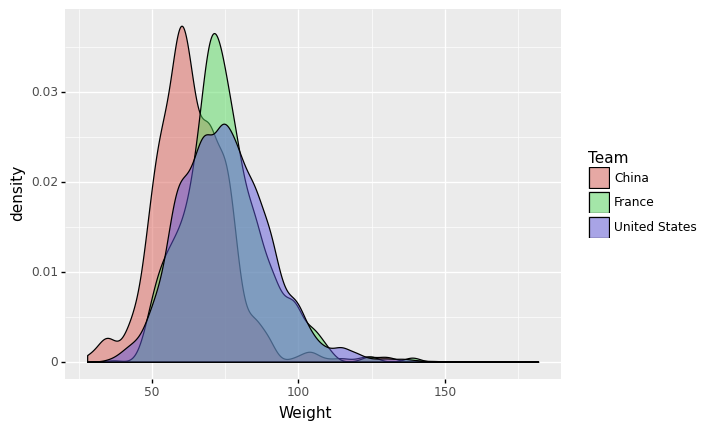

In [46]:
# Create the density plot 
print(p9.ggplot(result_df) + p9.aes('Weight', fill = 'Team') + p9.geom_density(alpha = 0.5))